Linear Regression - MSE: 453.5448274686898

Logistic Regression Results:
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
[[ 7  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



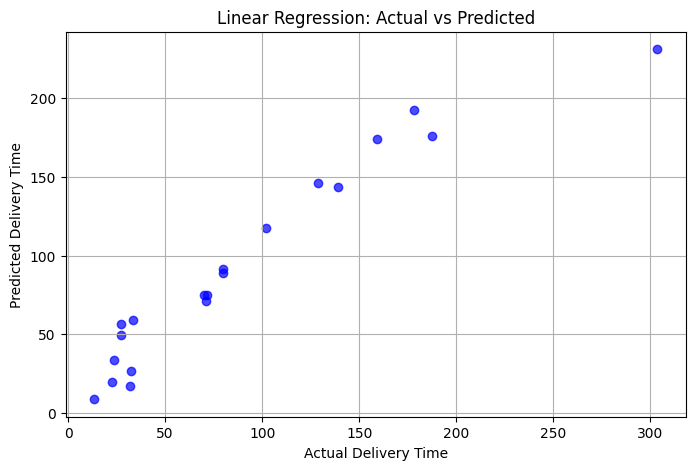

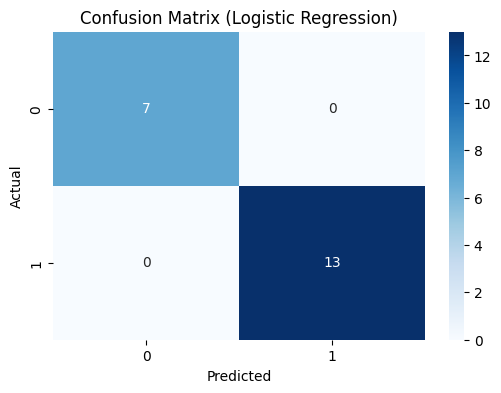

In [4]:
import numpy as np
import pandas as pd

np.random.seed(49)
n = 100

data = pd.DataFrame({
    'distance_km': np.random.randint(1, 50, n),
    'traffic_level': np.random.choice(['Low', 'Medium', 'High'], n),
    'vehicle_type': np.random.choice(['Bike', 'Van', 'Truck'], n),
    'weather': np.random.choice(['Clear', 'Rainy', 'Foggy'], n),
    'time_of_day': np.random.choice(['Morning', 'Afternoon', 'Evening'], n),
})

traffic_delay = {'Low': 1.0, 'Medium': 1.5, 'High': 2.0}
vehicle_speed = {'Bike': 25, 'Van': 40, 'Truck': 30}
weather_factor = {'Clear': 1.0, 'Rainy': 1.3, 'Foggy': 1.5}

data['base_speed'] = data['vehicle_type'].map(vehicle_speed)
data['traffic_multiplier'] = data['traffic_level'].map(traffic_delay)
data['weather_multiplier'] = data['weather'].map(weather_factor)

data['delivery_time'] = (data['distance_km'] / data['base_speed']) * \
                         data['traffic_multiplier'] * data['weather_multiplier'] * 60

data['delivery_time'] += np.random.normal(5, 3, n)
data['on_time'] = (data['delivery_time'] <= 90).astype(int)

from sklearn.model_selection import train_test_split

features = data[['distance_km', 'traffic_level', 'vehicle_type', 'weather']]
target_linear = data['delivery_time']
target_logistic = data['on_time']

X = pd.get_dummies(features, drop_first=True)

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X, target_linear, test_size=0.2, random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, target_logistic, test_size=0.2, random_state=42)


# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train_l, y_train_l)
y_pred_l = lin_model.predict(X_test_l)

print("Linear Regression - MSE:", mean_squared_error(y_test_l, y_pred_l))


# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_c, y_train_c)
y_pred_c = log_model.predict(X_test_c)

accuracy = accuracy_score(y_test_c, y_pred_c)
precision = precision_score(y_test_c, y_pred_c)
recall = recall_score(y_test_c, y_pred_c)
f1 = f1_score(y_test_c, y_pred_c)

print("\nLogistic Regression Results:")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test_c, y_pred_c))
print(classification_report(y_test_c, y_pred_c))


import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Linear Regression Graph
plt.figure(figsize=(8,5))
plt.scatter(y_test_l, y_pred_l, alpha=0.7, color='blue')
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

# 2️⃣ Confusion Matrix Graph (Logistic Regression)
cm = confusion_matrix(y_test_c, y_pred_c)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
